# Photon correlation spectroscopy development
### M. L. Whittaker 
### 26 June 2025

In [353]:
import importlib

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.optimize import curve_fit
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import RANSACRegressor

%load_ext autoreload
%autoreload 2
import pct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [354]:
path = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/PCT/Data/LiTFSI'
pct = importlib.reload(pct)
loader = pct.Dataloader(path)
data = loader.load()
analyzer = loader.Analyzer()

## SLS

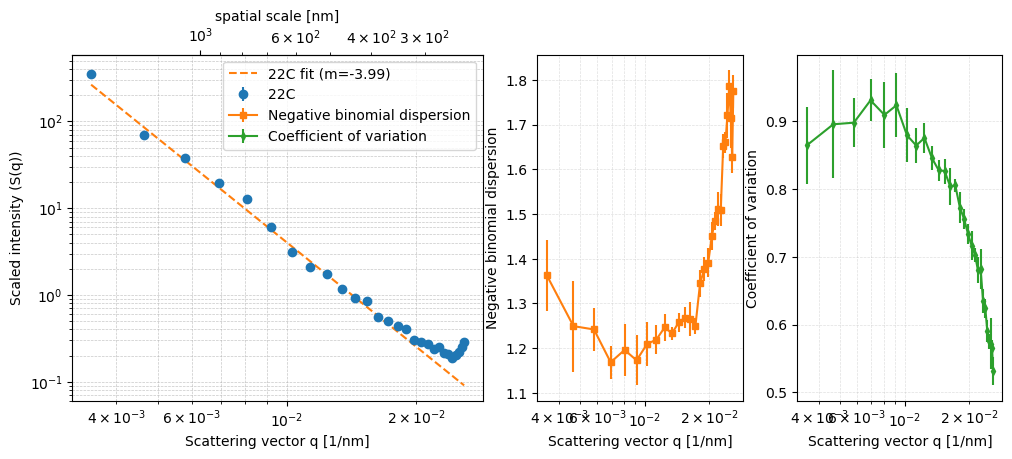

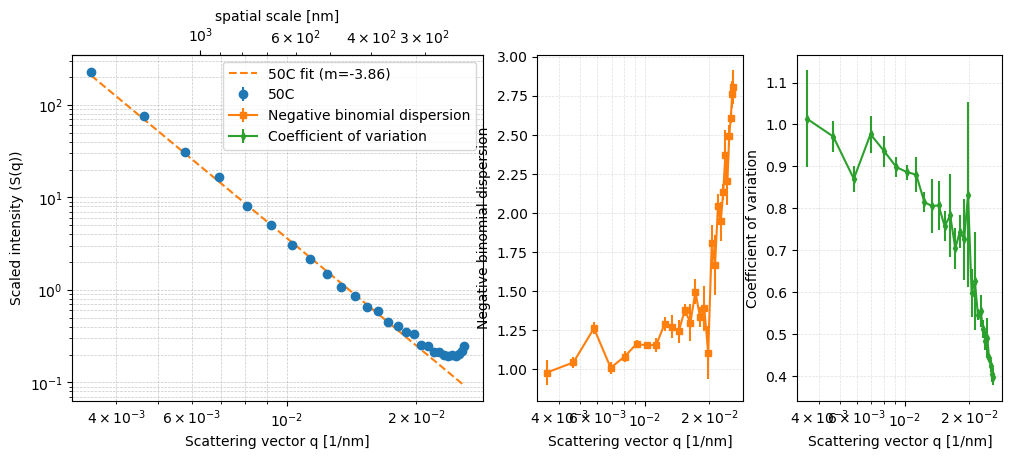

In [355]:
# first dataset
sq_I1, sq_err1, q1, nb_scale1, nb_scale_err1, cv_mean1, cv_std1 = analyzer.sq(data, sample='20m', experiment="22C")
fit1 = analyzer.sq_fit(q1, sq_I1, intensity_err=sq_err1, q_range=(4e-3, 2e-2))
axes1 = analyzer.plot_sq(
    q1,
    sq_I1,
    intensity_err=sq_err1,
    label="22C",
    logx=True,
    logy=True,
    scale_parameters=nb_scale1,
    scale_err=nb_scale_err1,
    cv_parameters=cv_mean1,
    cv_err=cv_std1,
    fit=fit1,
)

# second dataset on the same axes
sq_I2, sq_err2, q2, nb_scale2, nb_scale_err2, cv_mean2, cv_std2 = analyzer.sq(data, sample='20m', experiment="50C")
fit2 = analyzer.sq_fit(q2, sq_I2, intensity_err=sq_err2, q_range=(4e-3, 2e-2))
axes2 = analyzer.plot_sq(
    q2,
    sq_I2,
    intensity_err=sq_err2,
    label="50C",
    logx=True,
    logy=True,
    scale_parameters=nb_scale2,
    scale_err=nb_scale_err2,
    cv_parameters=cv_mean2,
    cv_err=cv_std2,
    fit=fit2,
)

sq_plot_22C = axes1
sq_plot_50C = axes2
plt.savefig("/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/PCT/Data/LiTFSI/20m/images/sq_plot_22C.png", dpi=300)
plt.savefig("/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/PCT/Data/LiTFSI/20m/images/sq_plot_50C.png", dpi=300)
plt.show()


In [356]:
wavelets = analyzer.trace(data, sample="20m", experiment="22C", measurement=1, signal_column=["CR CHA [kHz]"])

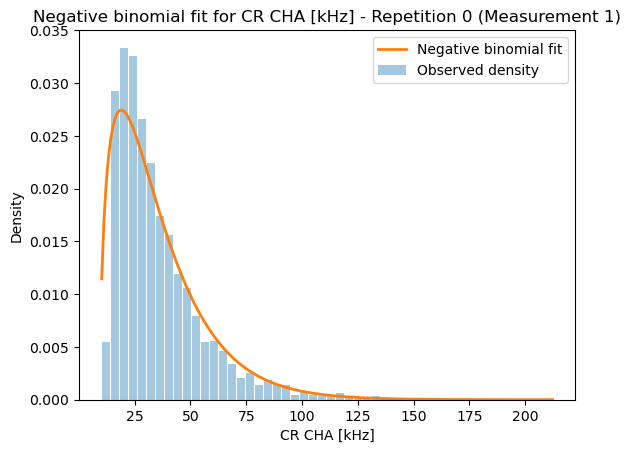

In [357]:
fit = analyzer.fit_negbinomial_trace(wavelets, measurement=1,
                               repetition="Repetition 0",
                               signal_column="CR CHA [kHz]",
                               )

fit_plot = analyzer.plot_negbinomial_fit(wavelets,
                                   measurement=1,
                                   repetition="Repetition 0",
                                   signal_column="CR CHA [kHz]",
                                   fit_results=fit)

## DLS

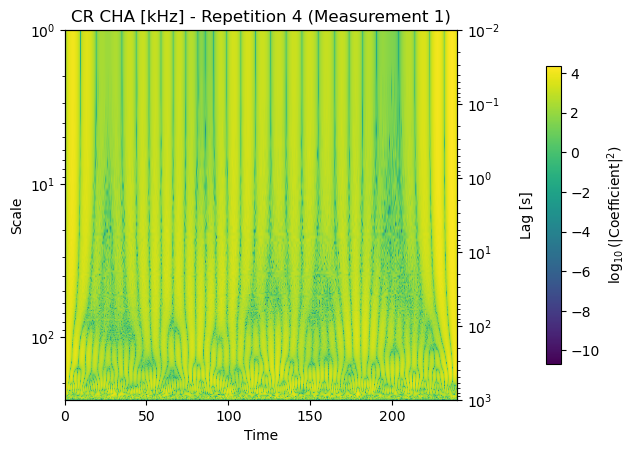

In [358]:
lags = analyzer.trace_lags(wavelets, measurement=1, repetition=4, concatenate=False)

lag_plot = analyzer.plot_wavelet(wavelets, 
                      measurement=1, 
                      repetition=4,
                      signal_column="CR CHA [kHz]",
                      concatenate=False, 
                      lag_results=lags)

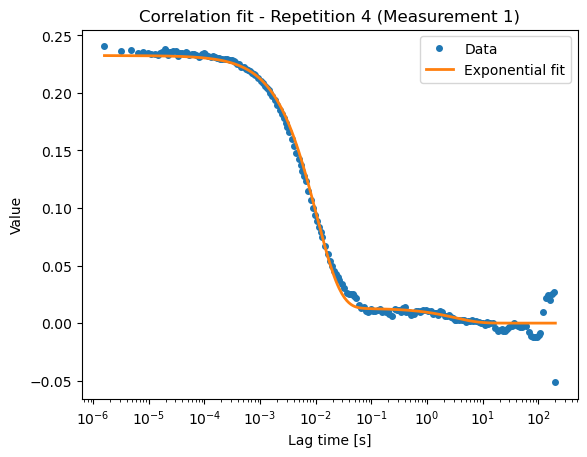

In [359]:
fit, ax = analyzer.fit_correlation_function(
    data,
    sample="20m",
    experiment="50C",
    measurement=1,
    repetition="Repetition 4",
    lag_results=lags,
    lag_signal_column="CR CHA [kHz]",
    max_components=5,
)

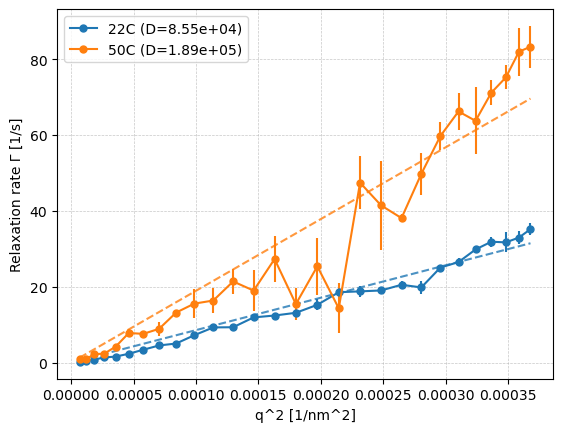

In [389]:
data = loader.load()
fit_results = analyzer.fit_diffusivity(data, sample="20m", experiment=["22C", "50C"], max_components=1, use_multi=False)
ax = analyzer.plot_diffusivity(fit_results, fit_line=True)

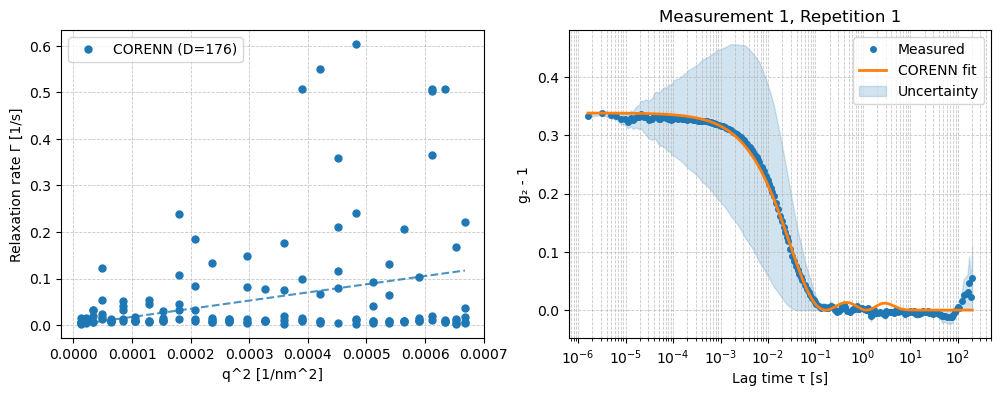

In [499]:
corenn_results = analyzer.corenn_multi_q(data, sample="20m", experiment="22C", temperature=295, viscosity=0.0345)
(ax_rate, ax_corr), fit = analyzer.plot_corenn_relaxation_rates(
    corenn_results,
    show_correlation=True,
    measurement=1,
    repetition="Repetition 1",
    fit_line=True,
)

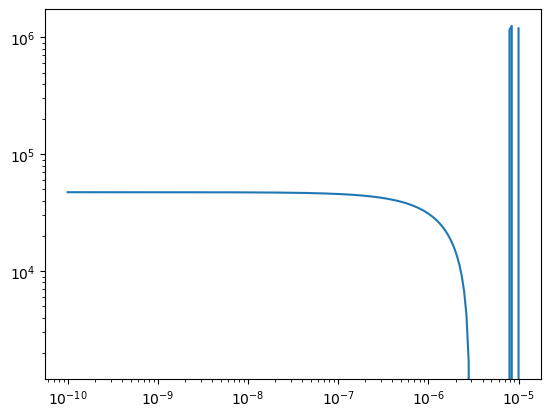

In [496]:
plt.plot(corenn_results['R_grid'], corenn_results['I_R'])
plt.xscale('log')
plt.yscale('log')